# signal analysis notebook
このノートブックでは、実際に筆者が書いた関数を呼び出し、それに基づいて信号の可視化を解析・解説しています。ソースコードは同じレポジトリ（src/utils.py）などを参照してください。


必要なパッケージのインストール

## メタデータ表示
信号波形は、デジタルな情報の羅列に過ぎません。そこで、それらを物理的に意味のある値として解釈するには、計測点と計測点の幅、使用したセンサの数（チャンネル数）と言ったファイル形式が重要です。これらをすべて出力することがまず必要になります。  
特に、エアリフトの実験においては2023年と2024年でデータ形式・ファイルの命名記法が大きくことなるので、それに応じた処理を行うことが重要です。

In [5]:
from src import analyze_mat_file
print('Hello world!')
if __name__ == "__main__":
    file_path = "/home/matsubara/database/signal_mat/s3_g0_l2_t2.mat"  # Update with your file path
    analyze_mat_file(file_path)

Analyzing: /home/matsubara/database/signal_mat/s3_g0_l2_t2.mat
File size: 3973.64 MB
Successfully loaded .mat file

=== File Metadata ===
__header__: b'PicoScope 7 T&M, Created on: 2025?6?9?'
__version__: 1.0
__globals__: []

=== Variables ===

Variable 1: Tstart
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: float32
  Min: 0.0
  Max: 0.0
  Mean: 0.0

Variable 2: Tinterval
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: float64
  Min: 1.9199999812258284e-08
  Max: 1.9199999812258284e-08
  Mean: 1.9199999812258284e-08

Variable 3: ExtraSamples
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 0
  Max: 0
  Mean: 0.0

Variable 4: RequestedLength
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 260416669
  Max: 260416669
  Mean: 260416669.0

Variable 5: Length
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 260416669
  Max: 260416669
  Mean: 260416669.0

Variable 6: Version
  Type: <class 

/home/matsubara/Scripts/sandbox/psdata2matlab/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:136: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


  Mean: nan

Variable 8: B
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -inf
  Max: inf
  Mean: nan

Variable 9: C
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -inf
  Max: inf
  Mean: nan

Variable 10: D
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -2.7299413681030273
  Max: 2.553816080093384
  Mean: -0.0015690232394263148

Total variables: 10

=== Nested Structures ===

Structure of: Tstart
Array: shape=(1, 1), dtype=float32

Structure of: Tinterval
Array: shape=(1, 1), dtype=float64

Structure of: ExtraSamples
Array: shape=(1, 1), dtype=int32

Structure of: RequestedLength
Array: shape=(1, 1), dtype=int32

Structure of: Length
Array: shape=(1, 1), dtype=int32

Structure of: Version
Array: shape=(1,), dtype=<U11

Structure of: A
Array: shape=(1, 260416673), dtype=float32

Structure of: B
Array: shape=(1, 260416673), dtype=float32

Structure of: C
Array: shape=(1, 260416

Loading data...
loading success
cuda
Found 60 triggered pulses
Hilbert transform matrix shape: (60, 5208) (number of pulses x number of samples)
パルス数: 60
画像を保存しました: /home/matsubara/database/tmp/P20240726-1600_tdx1.png
信号波形データを保存しました: /home/matsubara/database/tmp/P20240726-1600_tdx1.npy


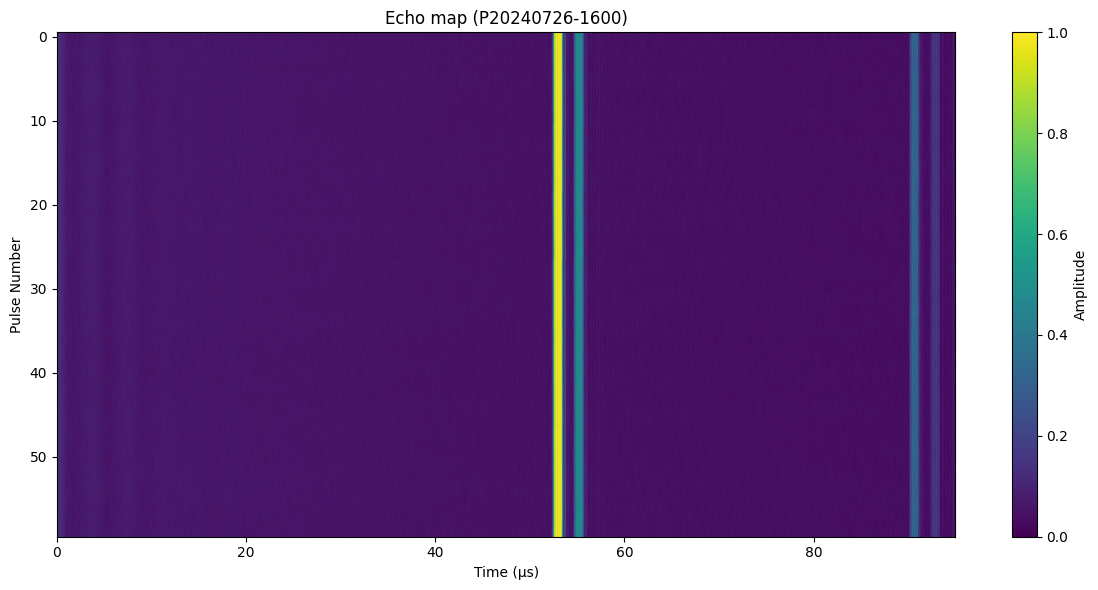

<Figure size 1500x1200 with 0 Axes>

In [4]:
from src import generate_echomap

file_path = "/home/matsubara/database/signal_mat/P20240726-1600.mat"
save_dir = "/home/matsubara/database/tmp"
triggered_pulses, adjusted_time_us, mean_pulse, std_pulse = generate_echomap(
    file_path, 
    start_time=2, 
    duration=0.02,
    window_width=100e-6, 
    amplitude_threshold=2.0, 
    output_dir=save_dir)

## トリガー検出
超音波波形データを画像に変換する上で最も重要なのは、その信号を並び替えるということです。特に超音波を照射するためにトランスデューサを強制的に振動させた点を起点として、そこから信号を並べるという操作が重要になります。
これらファイルの共通する性質として、超音波を３ｋHzで5秒間照射し、その反射波や透過波を計測した信号波形であるというものがあります。これらによって3つのトランスデューサに信号波形が記録されるという形式になります。
ではここで、一つの信号からトリガーを検出する、という関数を実行して挙動を見てみましょう。
### 注）
見るべき系の大きさは大体150㎜程度、すなわち音波にして100μsの領域です。つまり、一秒間に照射できる回数は、最大でも10k回です。現在は3khzの設定なので、見るべき時間幅は0.1msとしています。

In [1]:
from src import detect_triggers_from_signal
if __name__ == "__main__":
    # Example of detection from MAT file
    try:
        file_path = "/home/matsubara/database/signal_mat/P20241203-1005.mat"
        start_time = 0.0  # Start time in seconds
        duration = 1.0   # Duration in seconds
        amplitude_threshold = 2  # Amplitude threshold
        
        triggers, signal_chunk, fs = detect_triggers_from_signal(
            file_path=file_path,
            start_time=start_time,
            duration=duration,
            amplitude_threshold=amplitude_threshold,
            window_width=0.0001  # 0.1ms
        )
        
        print(f"Sampling frequency: {fs} Hz")
        print(f"Detected triggers: {len(triggers)}")
        print(f"Signal chunk length: {len(signal_chunk)} samples")
        
        # Display trigger times in seconds
        trigger_times = [t / fs for t in triggers]
        print(f"Trigger times (per seconds): {len(trigger_times)}")
        
    except Exception as e:
        print(f"Error: {e}") 

Loading data...
Error: Failed to load file: [Errno 2] No such file or directory: '/home/matsubara/database/signal_mat/P20241203-1005.mat'


## 画像化
これら検出されたトリガー点から300μsの範囲を切り出し、縦に並べたものが以下のようになります。左が生波形のプロット、右がヒルベルト変換後のプロットを示しています。

In [1]:
import numpy as np
import scipy.io as sio
import torch
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import os
from src import extract_waveforms_with_hilbert, extract_waveforms_from_trigger_times

# 使用例
if __name__ == "__main__":
    # TDX1からトリガーを検出済みという前提
    from trigger_detection import detect_triggers_from_signal
    
    file_path = "/home/matsubara/database/signal_mat/P20241203-1005.mat"
    start_time = 1e-9
    duration = 1
    amplitude_threshold = 2.0
    
    # 1. TDX1からトリガーを検出
    trigger_points, chunk, Fs = detect_triggers_from_signal(
        file_path=file_path,
        start_time=start_time,
        duration=duration,
        amplitude_threshold=amplitude_threshold,
        window_width=0.0001  # 0.1ms
    )
    
    # トリガー時刻を計算
    trigger_times = np.array(trigger_points) / Fs + start_time
    
    # 2. 全チャンネルから300μsの波形を切り出し（ヒルベルト変換込み）
    channels = ["TDX1", "TDX2", "TDX3", "TDX1_enlarged"]
    results = extract_waveforms_with_hilbert(
        file_path=file_path,
        channels=channels,
        trigger_times=trigger_times,
        starting_window=2e-6,  # -50μs
        ending_window=250e-6,    # +250μs（合計300μs）
        neglect_time=1e-6,      # 初期55μsを除去
        output_dir="/home/matsubara/database/tmp"
    )
    
    # 3. 平均波形をプロット
    #plot_average_waveforms(results, output_dir="/home/matsubara/database/tmp")
    
    print("\n=== Processing Complete ===")
    for channel, data in results.items():
        print(f"{channel}: {data['n_pulses']} pulses processed")

Loading data...
Loading successful
Using device: cuda
Number of detected triggers: 2988
Loading data...
Loading successful
Using device: cuda
Number of pulses: 2988
Window width: 248.0 μs
Neglect time: 1.0 μs
Processing channel TDX1...
Applying Hilbert transform to 2988 pulses...
Channel TDX1: Processed 2988 pulses
Hilbert matrix shape: (2988, 12916)
Trimmed matrix shape: (2988, 12864)
Saved comparison image: /home/matsubara/database/tmp/P20241203-1005_TDX1_hilbert_comparison.png
Saved Hilbert image: /home/matsubara/database/tmp/P20241203-1005_TDX1_hilbert_only.png
Processing channel TDX2...
Applying Hilbert transform to 2988 pulses...
Channel TDX2: Processed 2988 pulses
Hilbert matrix shape: (2988, 12916)
Trimmed matrix shape: (2988, 12864)
Saved comparison image: /home/matsubara/database/tmp/P20241203-1005_TDX2_hilbert_comparison.png
Saved Hilbert image: /home/matsubara/database/tmp/P20241203-1005_TDX2_hilbert_only.png
Processing channel TDX3...
Applying Hilbert transform to 2988 pul

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>